In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np

from effsim.paramgen import uniform_param_generator
from effsim.paramgen import distribution_param_generator
from effsim.effsim import EventSimulator
from effsim.effsim import NoiseMaker

from pytpc.hdfdata import HDFDataFile

import pytpc
from pytpc.tpcplot import pad_plot, chamber_plot
from pytpc.constants import degrees, pi

import csv
import yaml
import h5py

# Generating Parameters

In [4]:
with open('/home/taylor/Documents/independent-research/req-files/config_e15503b_p.yml', 'r') as f:
    config = yaml.load(f)
    
beam_enu0 = config['beam_enu0']
#print(beam_enu0)
beam_mass = config['beam_mass']
beam_charge = config['beam_charge']
mass_num = config['mass_num']
max_beam_angle = (config['max_beam_angle']*math.pi)/180
#print(max_beam_angle)
beam_origin_z = config['beam_origin_z']

gas = pytpc.gases.InterpolatedGas('isobutane', 19.2)

# number of events to create
num_evts = 100

In [21]:
#Generator Python object
pgen = uniform_param_generator(beam_enu0, beam_mass, beam_charge, mass_num, max_beam_angle, beam_origin_z, gas, num_evts)

In [22]:
#for params in pgen:
#    print(params)

In [23]:
# of the form ([x0, y0, z0, enu0, azi0, pol0], [beam vector (3d)])
p = next(pgen)

#p[0][0] = -0.00791423
#p[0][1] =  0.0030299
#p[0][2] = 0.56803276
#p[0][3] = 1.83097548
#p[0][4] =  0.11137931
#p[0][5] =  2.01473709

#print(p)


print(p[0][2]) # [x0, y0, z0, enu0, azi0, pol0]
#print(p[1]) # [beam vector (3d)] ?? x,y,z?

0.19543647262


In [24]:
sim = EventSimulator(config)

In [26]:
print(p[0])
#Creating simulated spiral from track parameters
#Finds center with an analytical function
#Uses EventGenerator to project the spiral onto the pad plane
evtClean, ctr = sim.make_event(p[0][0], p[0][1], p[0][2], p[0][3], p[0][4], p[0][5])
print(ctr)
#print(evtClean)

[-0.01136601 -0.01069042  0.19543647  3.69279224  3.96778866  2.68516697]
[-65.1376399   38.56374009]


In [10]:
pyevtClean = sim.convert_event(evtClean)
xyz = pyevtClean.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
print('max: ' + str(max(xyz[:,2])) + ',  min: ' + str(min(xyz[:,2])))

max: 8.94887078434,  min: 4.94827452143


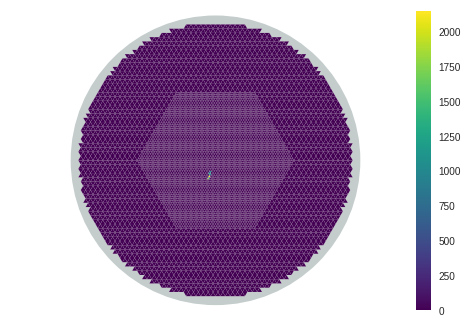

In [11]:
hits = np.zeros(10240)
for k, v in evtClean.items():
    #if hitmask[k]:
    hits[k] += v.max()
        
fig, sm = pad_plot(hits, scale='linear', cmap='viridis')
plt.colorbar(sm)

#plt.savefig('/home/taylor/Documents/independent-research/event-gen/plots/p_evt_00.pdf')
#plt.savefig('/home/taylor/Documents/independent-research/event-gen/plots/BAD_evt_example.pdf')

# Converting simulated events to Event objects

In [121]:
pyevtClean = sim.convert_event(evtClean)
#pyevtNoise = sim.convert_event(evtNoise)

#pyevtNoiseNOCLIP = sim.convert_event(evtNoiseNOCLIP)

#pyevtDepressNoise = sim.convert_event(evtDepressNoise)
#pyevtGaussianNoise = sim.convert_event(evtGaussianNoise)
#pyevtClipNoise = sim.convert_event(evtClipNoise)

In [122]:
print(pyevtClean)
#print(pyevtNoise)
#print(pyevtDepressNoise)
#print(pyevtGaussianNoise)
#print(pyevtClipNoise)

Event 0, timestamp 0.
Contains 247 traces.


# Plots

/usr/local/lib/python3.6/site-packages/pytpc-1.1.0-py3.6-linux-x86_64.egg/pytpc/evtdata.py:187: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(peak_data * range_idx, axis=-1) / peak_data.sum(axis=-1)


(-300, 300)

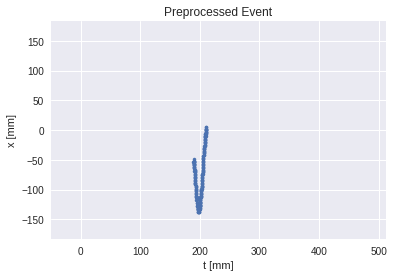

In [123]:
#new_xyzs = print
#new_xyzs = pyevtClean.xyzs()
#plt.plot(new_xyzs[:,0], new_xyzs[:,1], '.')
#plt.axis('equal')
    
plt.title('A Simulated Event')
    
plt.xlabel('t [mm]')
plt.ylabel('x [mm]')

xyzs = pyevtClean.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)

plt.plot(xyzs[:,2], xyzs[:,0], '.')
plt.axis('equal')

plt.title('Preprocessed Event')
    
plt.xlabel('t [mm]')
plt.ylabel('x [mm]')
plt.xlim((-50, 512))
plt.ylim((-300, 300))

186


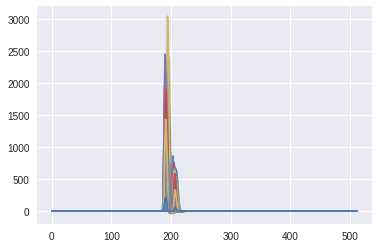

In [124]:
min_t = 1000
for trace in pyevtClean.traces['data']:
    plt.plot(trace)
    for i in range(len(trace)):
        if trace[i] > 0 and i < min_t:
            min_t = i
    #print(len(trace))
print(min_t)
#print(pyevtClean.traces['data'])

/usr/local/lib/python3.6/site-packages/pytpc-1.1.0-py3.6-linux-x86_64.egg/pytpc/evtdata.py:187: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(peak_data * range_idx, axis=-1) / peak_data.sum(axis=-1)


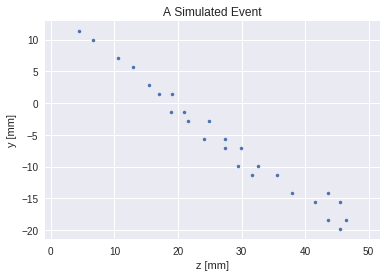

In [125]:
new_xyzs = pyevtNoise.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
plt.plot(new_xyzs[:,2], new_xyzs[:,1], '.')
plt.axis('equal')
    
plt.title('A Simulated Event')
    
plt.xlabel('z [mm]')
plt.ylabel('y [mm]')

/usr/local/lib/python3.6/site-packages/pytpc-1.1.0-py3.6-linux-x86_64.egg/pytpc/evtdata.py:187: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(peak_data * range_idx, axis=-1) / peak_data.sum(axis=-1)


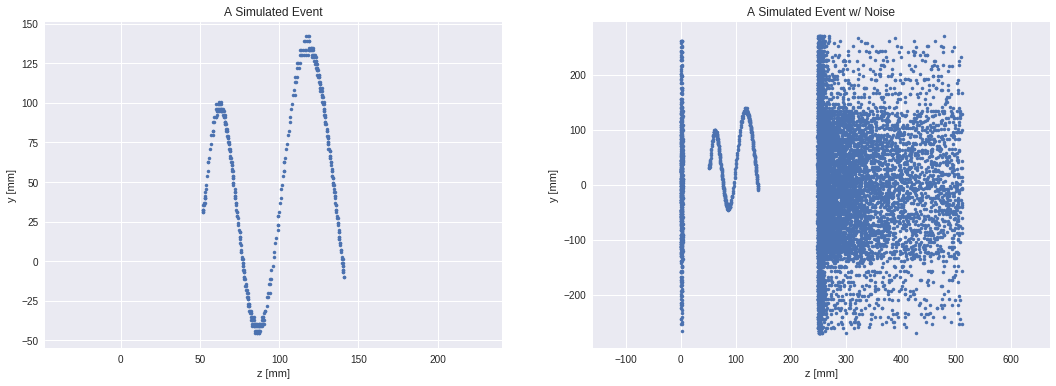

In [206]:
fig, ax = plt.subplots(1, 2, squeeze=True, figsize=(18, 6))

new_xyzs = pyevtClean.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
ax[0].plot(new_xyzs[:,2], new_xyzs[:,1], '.')
ax[0].axis('equal')
    
ax[0].set_title('A Simulated Event')
    
ax[0].set_xlabel('z [mm]')
ax[0].set_ylabel('y [mm]')

####################################################################################################################
new_xyzs_Noise = pyevtNoise.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
ax[1].plot(new_xyzs_Noise[:,2], new_xyzs_Noise[:,1], '.')
ax[1].axis('equal')
    
ax[1].set_title('A Simulated Event w/ Noise')
    
ax[1].set_xlabel('z [mm]')
ax[1].set_ylabel('y [mm]')

#fig.savefig('/home/taylor/Documents/independent-research/event-gen/plots/noiseCompare_pzy.pdf')

/usr/local/lib/python3.6/site-packages/pytpc-1.1.0-py3.6-linux-x86_64.egg/pytpc/evtdata.py:187: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(peak_data * range_idx, axis=-1) / peak_data.sum(axis=-1)


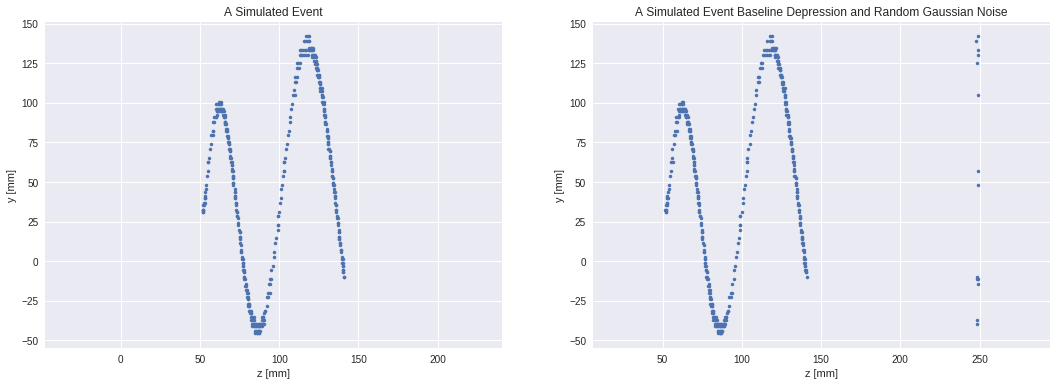

In [207]:
fig, ax = plt.subplots(1, 2, squeeze=True, figsize=(18, 6))

new_xyzs = pyevtClean.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
ax[0].plot(new_xyzs[:,2], new_xyzs[:,1], '.')
ax[0].axis('equal')
    
ax[0].set_title('A Simulated Event')
    
ax[0].set_xlabel('z [mm]')
ax[0].set_ylabel('y [mm]')

####################################################################################################################
xyzs_NoiseNOCLIP = pyevtNoiseNOCLIP.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
ax[1].plot(xyzs_NoiseNOCLIP[:,2], xyzs_NoiseNOCLIP[:,1], '.')
ax[1].axis('equal')
    
ax[1].set_title('A Simulated Event Baseline Depression and Random Gaussian Noise')
    
ax[1].set_xlabel('z [mm]')
ax[1].set_ylabel('y [mm]')

#fig.savefig('/home/taylor/Documents/independent-research/event-gen/plots/noiseCompare_pzy.pdf')

/usr/local/lib/python3.6/site-packages/pytpc-1.1.0-py3.6-linux-x86_64.egg/pytpc/evtdata.py:187: RuntimeWarning: invalid value encountered in true_divide
  return np.sum(peak_data * range_idx, axis=-1) / peak_data.sum(axis=-1)


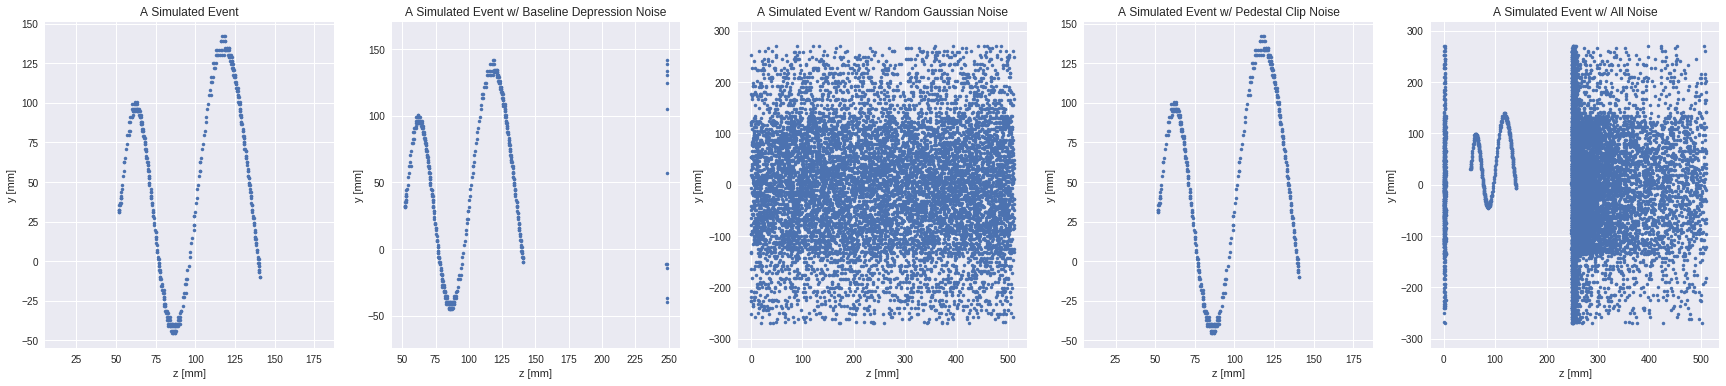

In [294]:
fig, ax = plt.subplots(1, 5, squeeze=True, figsize=(30, 6))

xyzs_clean = pyevtClean.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
ax[0].plot(xyzs_clean[:,2], xyzs_clean[:,1], '.')
ax[0].axis('equal')
    
ax[0].set_title('A Simulated Event')
    
ax[0].set_xlabel('z [mm]')
ax[0].set_ylabel('y [mm]')

####################################################################################################################
xyzs_DepressNoise = pyevtDepressNoise.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
ax[1].plot(xyzs_DepressNoise[:,2], xyzs_DepressNoise[:,1], '.')
ax[1].axis('equal')
    
ax[1].set_title('A Simulated Event w/ Baseline Depression Noise')
    
ax[1].set_xlabel('z [mm]')
ax[1].set_ylabel('y [mm]')

####################################################################################################################
xyzs_GaussianNoise = pyevtGaussianNoise.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
ax[2].plot(xyzs_GaussianNoise[:,2], xyzs_GaussianNoise[:,1], '.')
ax[2].axis('equal')
    
ax[2].set_title('A Simulated Event w/ Random Gaussian Noise')
    
ax[2].set_xlabel('z [mm]')
ax[2].set_ylabel('y [mm]')

####################################################################################################################
xyzs_ClipNoise = pyevtClipNoise.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
ax[3].plot(xyzs_ClipNoise[:,2], xyzs_ClipNoise[:,1], '.')
ax[3].axis('equal')
    
ax[3].set_title('A Simulated Event w/ Pedestal Clip Noise')
    
ax[3].set_xlabel('z [mm]')
ax[3].set_ylabel('y [mm]')

####################################################################################################################
xyzs_Noise = pyevtNoise.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)
ax[4].plot(xyzs_Noise[:,2], xyzs_Noise[:,1], '.')
ax[4].axis('equal')
    
ax[4].set_title('A Simulated Event w/ All Noise')
    
ax[4].set_xlabel('z [mm]')
ax[4].set_ylabel('y [mm]')

#fig.savefig('/home/taylor/Documents/independent-research/event-gen/plots/separateNoiseCompare_stDev5e-1.pdf')

(-296.94822653861917,
 296.94822653861917,
 -296.31532412317767,
 296.31532412317767)

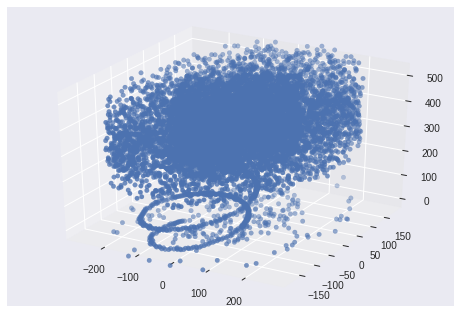

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

new_xyzs = pyevtNoise.xyzs(peaks_only=True, return_pads=True, baseline_correction=False, cg_times=False)
#print(len(new_xyzs[:,2]))
ax.scatter(new_xyzs[:,0], new_xyzs[:,1],new_xyzs[:,2])
ax.axis('equal')

#fig.savefig('/home/taylor/Documents/independent-research/event-gen/plots/noiseCompare_p3d_Noise.pdf')

(-296.94822653861917,
 296.94822653861917,
 -296.31532412317767,
 296.31532412317767)

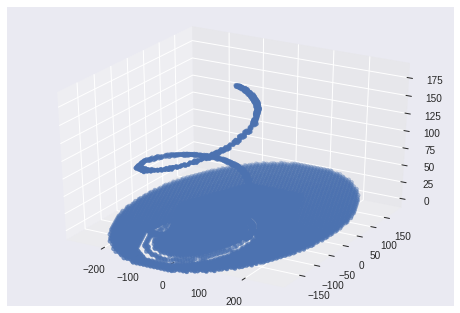

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

new_xyzs = pyevtClean.xyzs(peaks_only=True, return_pads=True, baseline_correction=False, cg_times=False)
#print(len(new_xyzs[:,2]))
ax.scatter(new_xyzs[:,0], new_xyzs[:,1],new_xyzs[:,2])
ax.axis('equal')

#fig.savefig('/home/taylor/Documents/independent-research/event-gen/plots/noiseCompare_p3d.pdf')

In [66]:
#fig = plt.figure()

#ax = fig.add_subplot(111, projection='3d')
#new_xyzs = pyevt.xyzs(peaks_only=True, return_pads=True, baseline_correction=False, cg_times=False)
#ax.scatter(new_xyzs[:,0], new_xyzs[:,1],new_xyzs[:,2])

#new_xyzs_noise = pyevtNoise.xyzs(peaks_only=True, return_pads=True, baseline_correction=False, cg_times=False)
#ax.scatter(new_xyzs_noise[:,0], new_xyzs_noise[:,1],new_xyzs_noise[:,2], 
#           c = ('blue' if (new_xyzs_noise[:,0] in new_xyzs) else 'red'))

#ax.axis('equal')

/usr/local/lib/python3.6/site-packages/pytpc-1.1.0-py3.6-linux-x86_64.egg/pytpc/tpcplot.py:168: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax.set_axis_bgcolor('none')


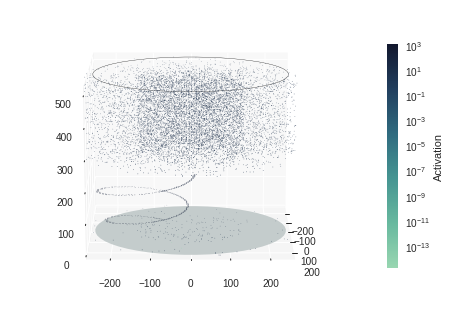

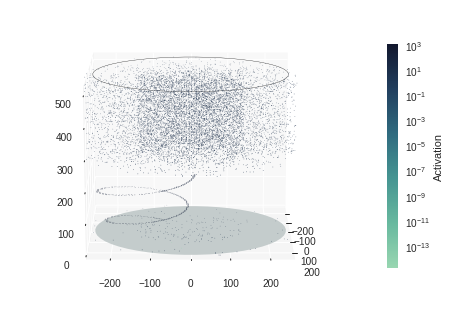

In [69]:
new_xyzs_noise = pyevtNoise.xyzs(peaks_only=True, return_pads=True, baseline_correction=True, cg_times=True)

chamber_plot(new_xyzs_noise[:])
#plt.savefig('/home/taylor/Documents/independent-research/event-gen/plots/chamber_plot.pdf')

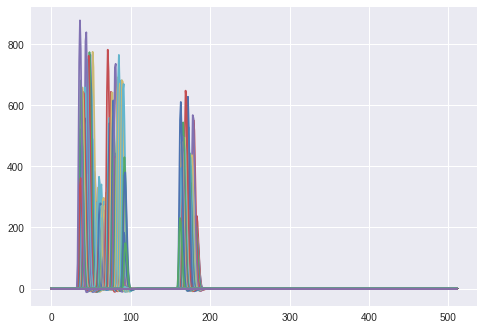

In [190]:
#for trace in pyevtClean.traces['data']:
#    plt.plot(trace)

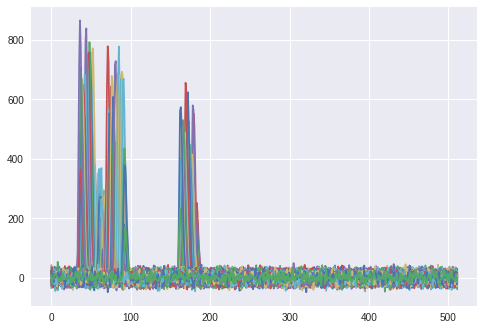

In [133]:
#for trace in pyevtGaussianNoise.traces['data']:
#    plt.plot(trace)

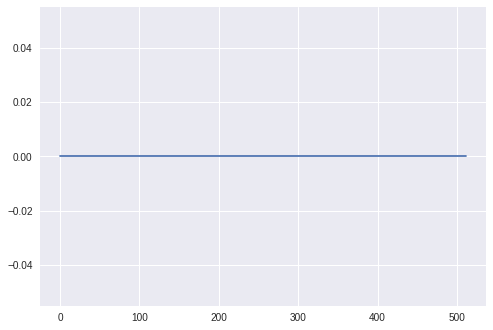

In [193]:
tr = pyevtClean.traces['data'][3776]
plt.plot(tr)


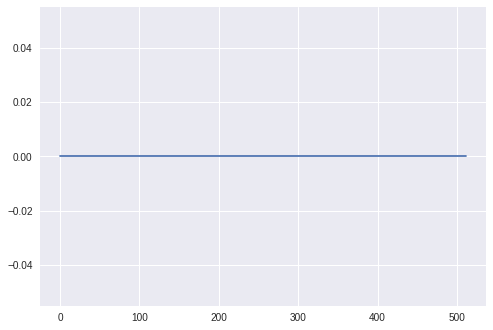

In [194]:
tr1 = pyevtGaussianNoise.traces['data'][3776]
plt.plot(tr1)
#plt.xlim(-10,100)

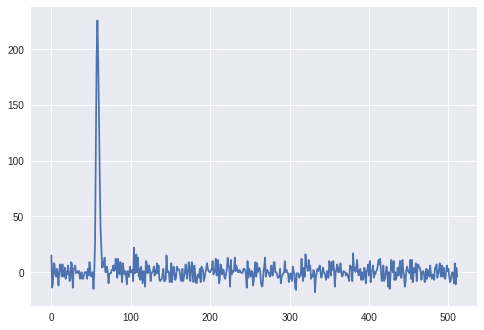

In [195]:
tr2 = pyevtGaussianNoise.traces['data'][0]
plt.plot(tr2)

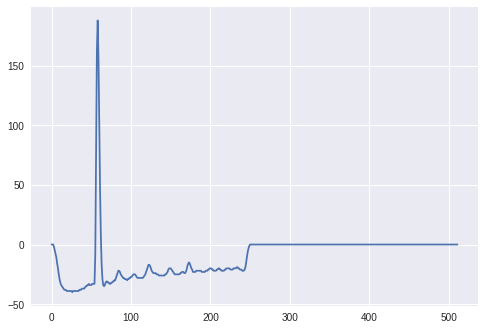

In [196]:
tr2 = pyevtDepressNoise.traces['data'][0]
plt.plot(tr2)

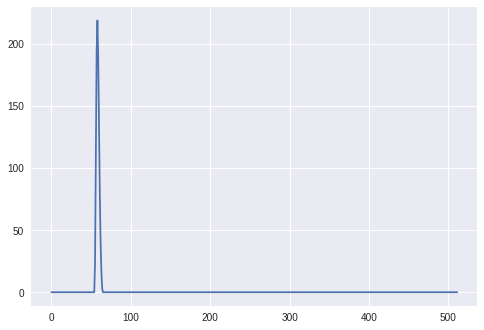

In [197]:
tr2 = pyevtClipNoise.traces['data'][0]
plt.plot(tr2)